# Spencer Hallyburton
# Homework 8
# Collaborators: Salvador Barragan

**Harvard University**<br>
**Spring 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Friday, March 30th, 2018 at 11:00am

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import theano

## Problem 1: Understanding Yelp Review Data As a Human
In this course, we've spent a lot of time learning algorithms for performing inference on complex models and we've spent time using these models to make decisions regarding our data. But in nearly every assignment, the model for the data is specified in the problem statement. In real life, the creative and, arguably, much more difficult task is to start with a broadly defined goal and then to customize or create a model which will meet this goal in some way. 



Problem #1 is atypical in that it does not involve any programming or (necessarily) difficult mathematics/statistics. The process of answering these questions *seriously* will however give you an idea of how one might create or select a model for a particular application and your answers will help you with formalizing the model if and when you're called upon to do so.

***Grading:*** *We want you to make a genuine effort to mold an ambiguous and broad real-life question into a concrete data science or machine learning problem without the pressure of getting the "right answer". As such, we will grade your answer of Problem #1 on a pass/fail basis. Any reasonable answer that demonstrates actual effort will be given a full grade.*

We've compiled for you a fairly representative selection of [Yelp reviews](./yelp_reviews.zip) for a (now closed) sushi restaurant called Ino's Sushi in San Francisco. Read the reviews and form an opinion regarding the various qualities of Ino's Sushi. Answer the following:

**1. If the task is to summarize the quality of a restaurant in a simple and intuitive way, what might be problematic with simply classifying this restaurant as simply "good" or "bad"? Justify your answers with specific examples from the dataset.**
- People have different criteria for what is good. Kristen B, in her review, makes this very clear, as she seems to show two different points of view in her review. First, show notes that it is likely that some appreciate the food more than the service or atmosphere, whereas others more value the food over service. As a result, people have different definitions of good and bad and base these definitions on different criteria.
- Additionally, some restaurant-goers write a review without having even experienced the food at all! For example, Ling C. writes a 1-star review based on a very short conversation with the waitress/hostess, but this review has no bearing at all on certain aspects of the restaurant. Therefore, we do not want to place to much weight on this review, given that it is on such a small time sample

**2. For Ino's Sushi, categorize the food and the service, separately, as "good" or "bad" based on all the reviews in the dataset. Be as systematic as you can when you do this.**

  (**Hint:** Begin by summarizing each review. For each review, summarize the reviewer's opinion on two aspects of the restaurant: food and service. That is, generate a classification ("good" or "bad") for each aspect based on what the reviewer writes.)
  - Surya G: 1 star
      - Food - Good: mentions three cases, and two out of three mentioned have positive descriptors of the food
      - Service - Bad: specific examples of rude behavior from the staff
  - Karen L.: 5 stars
      - Food - Good: "sushi was...amaaaaaazing!!!" says it all!
      - Service - Bad: "Service can make you feel uncomfortable...the pop won't be nice to you"
  - Tony L.: 1 star
      - Food - N/A
      - Service - Bad: "Was made to feel singled out...nice to be vlaued for being a customer, not a dollar"
  - Kristen B.: 1 star
      - Food - Good: "High quality sushi", "If you are a total foodie..."
      - Service - Bad: "Absolutely horrendous service...made fun of us"
  - Sylvia L.: 5 stars
      - Food - Good: "Authentic sushi restaurant with a chef that takes his craft very seriously." "Is the sushi worth it? Yes."
      - Service - Good: "The chef is actually a really nice, happy, jokey guy"
  - Youna K.: 5 stars
      - Food - Good: "Like really enjoy your sushi."
      - Service - Good: "You come in here...sit, order politely..."
  - Alison C.: 5 stars
      - Food - Good: "Which was freakin fantastic...how amazing Ino's rice is...how great the meal was"
      - Service - N/A
  - Michael L.: 5 stars
      - Food - Good: "You come here to eat authentic Japanese sushi"
      - Service - N/A
  - Ling C.: 1 star
      - Food - N/A
      - Service - Bad: "Got kicked out - literally...talk about an unpleasant experience"
  - Maile N: 5 stars
      - Food - Good: "Best sushi I've had in a long long long long long time."
      - Service - Good: "Sushi chef is so cute..."

**3. Identify statistical weaknesses in breaking each review down into an opinion on the food and an opinion on the service. That is, identify types of reviews that make your method of summarizing the reviewer's opinion on the quality of food and service problemmatic, if not impossible. Use examples from your dataset to support your argument.**

- In some instances, reviewers do not always comment on both the food and the service. In these cases, I have filled the corresponding entries with N/A. For example, several reviewers, such as Ling C., and Tony L., did not even get to the point of eating and left before they had the opportunity to do so. In this case, providing a classification of their food experience based on the review is impossible!
- Additionally, some reviewers fixate their review on particular aspects, even if they were able to enjoy (or not enjoy) particular aspects of the restaurant. For example, Michael L. has high praise for the quality of food at Ino's, however, he mentions nothing about the service, even though he was able to interact with the staff at the restaurant. It is difficult, as a result, to assign a classification of the service to his review, although one might be able to infer this based on the fact that his rating is 5 stars. However, this is not always a valid assumption to make!

**4. Identify all the ways in which the task in #2 might be difficult for a machine to accomplish. That is, break down the classification task into simple self-contained subtasks and identify how each subtask can be accomplished by a machine (i.e. which area of machine learning, e.g. topic modeling, sentiment analysis etc, addressess this type of task).**
These are the steps in performing the classification task in number 2:
1. Topic Segmentation: Identify which sections of the review concern the food and which concern the service
    - Do so by looking for key words
    - Key words include: Food -  "food, sushi, taste, eat...", Service - "Staff, waitress, chef, Ino, man, lady"
2. Sentiment Identification: In each of the sections of the review, identify descriptor words
    - Positive descriptors: "good, tasty, amazing, delicious, fast, high quality..."
    - Negative descriptors: "bad, rude, mean, gross, low quality..."
3. Sentiment Analysis: Get a sense if there are more positive or negative descriptors for each of the sections
4. Based on the ratio of positive to negative descriptors, assign a rating for each of the components of each of the ratings

**Difficulties:**
- A difficulty of this procedure include the fact that there is not an exhaustive set of words that fall into the categories of the topics or of the sentiments. As a result, it might be difficult for a machine to reliably indicate which sections of text correspond to certain words.
- Another difficulty is that it can be difficult to compute the sentiment analysis when getting a sense of the ratio between positive to negative, given that some key descriptor words ought to be given more weight than others.
- Another difficulty lies in the fact that it might be ambiguous whether a rating contains more of a positive or a negative sentiment. It can be difficult for a machine, therefore, to discriminate between the two ratings.

**5. Describe a complete pipeline for processing and transforming the data to obtain a classification for both food and service for each review.**
1. Compile a list of key words that allow the computer to discriminate between food and service components of the review as a whole.
2. Using these key words, identify which passages of the review concern the food and which concern the service of the restaurant. Use distance metrics, such as edit or Hamming distance, to bundle words that are similar to the key words (such as a plural or mis-spelling of one of the key words)
3. Once you have identified the sections of each review component, look for key descriptor, or sentiment-based, words that can give you an idea of the sentiment of the review concerning each of the main areas. Do this by looking for these sentiment words within some distance of words away from the key word identified in part 2. 
4. After linking sentiment words with their associated categories, begin to analyze the overall tendencies of each of these categories by looking a the frequency and number of occurrences of linkages between sections and positive or negative words. If desired, weight some key words more heavily than others if they provide an overwhelming sentiment in one direction or the other.
5. Use a threshold or some other criteria to make a determination on the binary classification of the section into a "good" or "bad" overall sentiment. 

## Problem 2: My Sister-In-Law's Baby Cousin Tracy ...


Wikipedia describes the National Annenberg Election Survey as follows -- "National Annenberg Election Survey (NAES) is the largest academic public opinion survey conducted during the American presidential elections. It is conducted by the Annenberg Public Policy Center at the University of Pennsylvania."  In the file [survey.csv](./survey.csv) we provide the following data from the 2004 National Annenberg Election Survey:  `age` -- the age of the respondents, `numr` -- the number of responses, and `knowlgbtq` -- the number of people at the given age who have at least one LGBTQ acquaintance.  We want you to model how age influences likelihood of interaction with members of the LGBTQ community in three ways. 


1. Using pymc3, create a bayesian regression model (either construct the model directly or use the glm module) with the same feature and dependent variable. Plot the mean predictions for ages 0-100, with a 2-sigma envelope.

2. Using pymc3, create a 1-D Gaussian Process regression model with the same feature and dependent variables.  Use a squared exponential covariance function. Plot the mean predictions for ages 0-100, with a 2-sigma envelope.

3. How do the models compare? Does age influence likelihood of acquaintance with someone LGBTQ? For Bayesian Linear Regression and GP Regression, how does age affect the variance of the estimates?

For GP Regression, we can model the likelihood of knowing someone LGBTQ as a product of binomials -- one binomial distribution per age group. 

$$p(y_a | \theta_a, n_a) = Binom( y_a, n_a, \theta_a)$$

where $y_a$ (i.e. `knowlgbtq`) is the observed number of respondents who know someone lgbtq  at age $a$, $n_a$ (i.e. `numr`) is the number of trials and $\theta_a$ is the rate parameter for having an lgbtq acquaintance at age $a$.

Using the Gaussian approximation  (http://en.wikipedia.org/wiki/Binomial_distribution#Normal_approximation) to approximate the Binomial since `numr` is large, you can simply use a GP posterior with the error for each measurement to be given using this approximation. 

In [2]:
# Read in the data:
my_data = np.genfromtxt('survey.csv', delimiter=',', skip_header=1)
print('Data Shape:', my_data.shape)
age = my_data[:,0]
pLGBTQ = my_data[:,2]/my_data[:,1]

Data Shape: (78, 3)


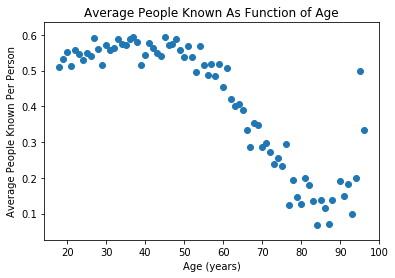

In [3]:
plt.scatter(age, pLGBTQ)
plt.xlabel('Age (years)')
plt.ylabel('Average People Known Per Person')
plt.title('Average People Known As Function of Age')
plt.show()

### 1. Bayesian Regression Model

In [4]:
# Use pymc3 to create regression model:
with pm.Model() as LinearModel1:
    # Define priors
    intercept = pm.Uniform('intercept', lower=0, upper=1)
    slope = pm.Normal('slope', 0, sd=10)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    
    # Deterministic
    mu = pm.Deterministic('mu',intercept + slope*age)
    pknow = pm.Normal('pLG', mu=mu, sd=sigma, observed=pLGBTQ)

In [5]:
# Sample from the model:
with LinearModel1:
    stepper=pm.Metropolis()
    traceBLR1 = pm.sample(10000, step=stepper)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [sigma_interval__]
>Metropolis: [slope]
>Metropolis: [intercept_interval__]
100%|██████████| 10500/10500 [00:06<00:00, 1716.05it/s]
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e7d1a58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e942518>]], dtype=object)

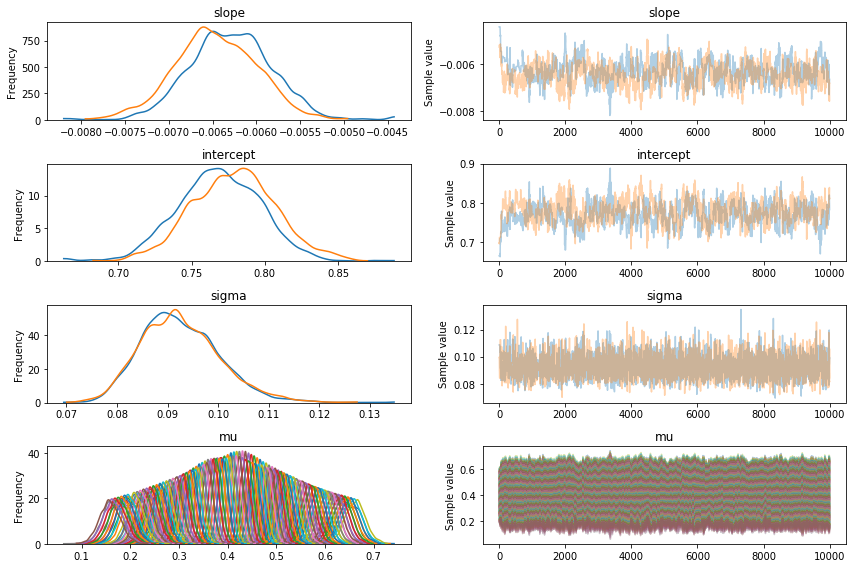

In [6]:
# Show diagnostic plots:
pm.traceplot(traceBLR1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e77c898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1268088d0>]], dtype=object)

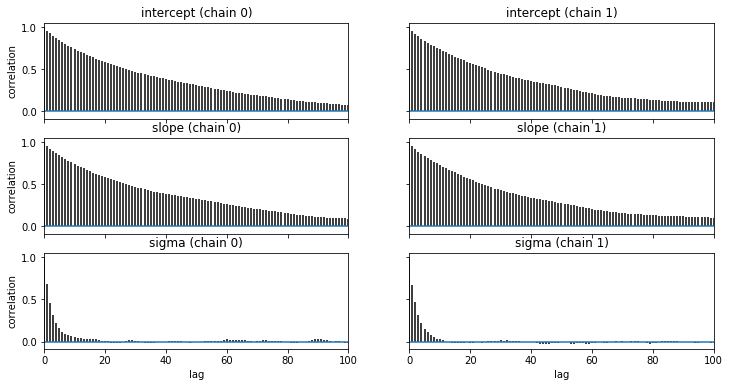

In [7]:
pm.autocorrplot(traceBLR1, varnames=['intercept', 'slope', 'sigma'])

In [8]:
hm2df=pm.trace_to_dataframe(traceBLR1, varnames=['intercept', 'slope', 'sigma'])
hm2df.corr()

,intercept,slope,sigma
intercept,1.000000,-0.929733,-0.015914
slope,-0.929733,1.000000,0.019174
sigma,-0.015914,0.019174,1.000000


Based on the results above, we see that there is a large anticorrelation between intercept and slope. To get rid of this, we should center the data and try the process again.

In [9]:
# Use pymc3 to create regression model:
with pm.Model() as LinearModel2:
    # Define priors
    intercept = pm.Uniform('intercept', lower=0, upper=1)
    slope = pm.Normal('slope', 0, sd=10)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    
    # Deterministic
    mu = pm.Deterministic('mu',intercept + slope*(age-np.mean(age)))
    pknow = pm.Normal('pLG', mu=mu, sd=sigma, observed=pLGBTQ)

In [10]:
# Sample from the model:
with LinearModel2:
    stepper=pm.Metropolis()
    traceBLR2 = pm.sample(10000, step=stepper)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [sigma_interval__]
>Metropolis: [slope]
>Metropolis: [intercept_interval__]
100%|██████████| 10500/10500 [00:05<00:00, 1916.71it/s]
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1272af358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1276399e8>]], dtype=object)

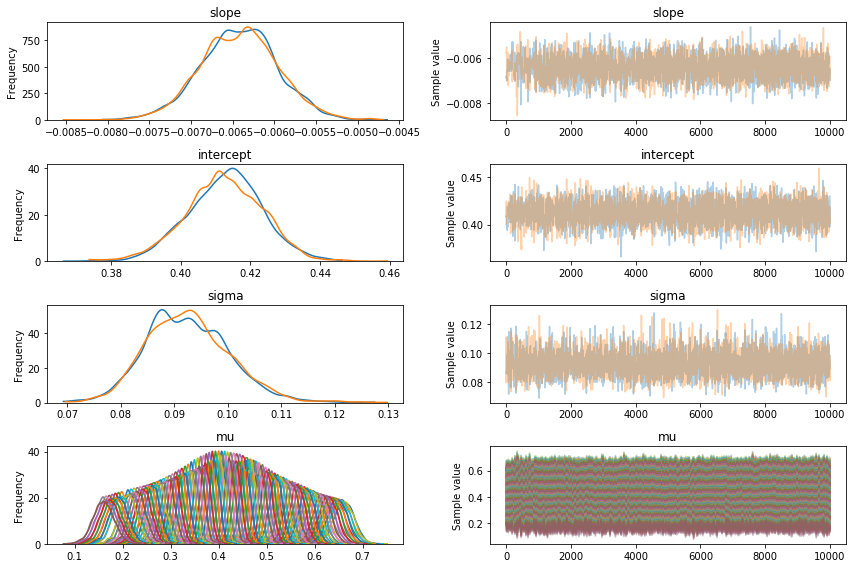

In [11]:
# Show diagnostic plots:
pm.traceplot(traceBLR2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b8598d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12d79f7f0>]], dtype=object)

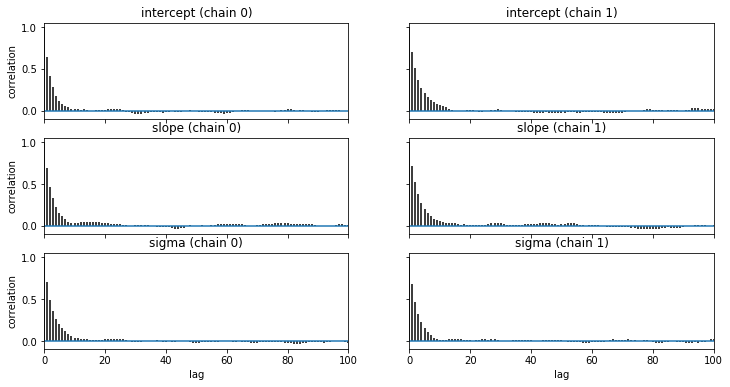

In [12]:
pm.autocorrplot(traceBLR2, varnames=['intercept', 'slope', 'sigma'])

In [13]:
hm2df=pm.trace_to_dataframe(traceBLR2, varnames=['intercept', 'slope', 'sigma'])
hm2df.corr()

,intercept,slope,sigma
intercept,1.000000,0.009326,-0.003354
slope,0.009326,1.000000,0.008617
sigma,-0.003354,0.008617,1.000000


Much better! We see now that the correlation dies down by about lag of 20.

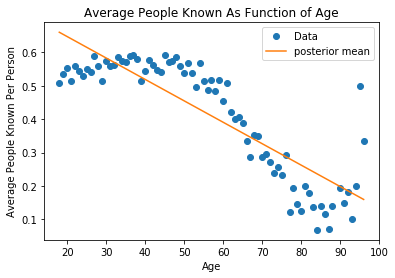

In [14]:
# Plot the posterior means:
plt.plot(age, pLGBTQ, 'o', label='Data')
plt.plot(age, traceBLR2['mu'].mean(axis=0), label="posterior mean")
plt.xlabel('Age')
plt.ylabel('Average People Known Per Person')
plt.title('Average People Known As Function of Age')
plt.legend()
plt.show()

In [15]:
meanage = np.mean(age)
agegrid = np.arange(10, 100)
mu_pred = np.zeros((len(agegrid), 2*len(traceBLR2)))
for i, ag in enumerate(agegrid):
    mu_pred[i] = traceBLR2['intercept'] + traceBLR2['slope'] * (ag - meanage)

In [16]:
# Plot the posteriors using HPD at each point
mu_mean = mu_pred.mean(axis=1)
mu_hpd = pm.hpd(mu_pred.T)

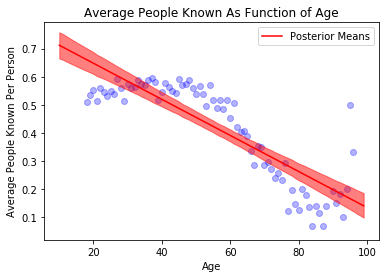

In [17]:
plt.scatter(age, pLGBTQ, c='b', alpha=0.3)
plt.plot(agegrid, mu_mean, 'r', label='Posterior Means')
plt.fill_between(agegrid, mu_hpd[:,0], mu_hpd[:,1], color='r', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Average People Known Per Person')
plt.title('Average People Known As Function of Age')
plt.legend()
plt.show()

In [18]:
n_ppredsamps=1000
agegrid = np.arange(10, 100)
meanage = np.mean(age)
ppc_samples=np.zeros((len(agegrid), n_ppredsamps))

for j in range(n_ppredsamps):
    k=np.random.randint(2*len(traceBLR2))#samples with replacement
    musamps = traceBLR2['intercept'][k] + traceBLR2['slope'][k] * (agegrid - meanage)
    sigmasamp = traceBLR2['sigma'][k]
    ppc_samples[:,j] = np.random.normal(musamps, sigmasamp)
ppc_samples_hpd = pm.hpd(ppc_samples.T)

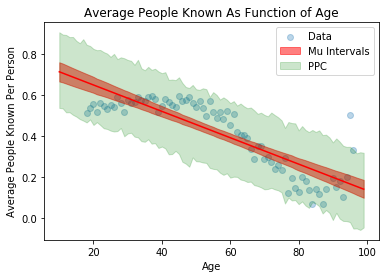

In [19]:
plt.scatter(age, pLGBTQ, alpha=0.3, label='Data')
plt.plot(agegrid, mu_mean, 'r')
plt.fill_between(agegrid, mu_hpd[:,0], mu_hpd[:,1], color='r', alpha=0.5, label='Mu Intervals')
plt.fill_between(agegrid, ppc_samples_hpd[:,0], ppc_samples_hpd[:,1], color='green', alpha=0.2, label='PPC')
plt.xlabel('Age')
plt.ylabel('Average People Known Per Person')
plt.title('Average People Known As Function of Age')
plt.legend()
plt.show()

### Gaussian Process Regression

In [20]:
with pm.Model() as GPModel:
    # priors on the covariance function hyperparameters
    l = pm.Uniform('l', 0, 20)
    # uninformative prior on the function variance
    s2_f = pm.HalfCauchy('s2_f', beta=20)
    # uninformative prior on the noise variance
    s2_n = pm.HalfCauchy('s2_n', beta=5)
    # covariance functions for the function f and the noise
    f_cov = s2_f**2 * pm.gp.cov.ExpQuad(1, l)
    mgp = pm.gp.Marginal(cov_func=f_cov)
    pLG_obs = mgp.marginal_likelihood('pLG_obs', X=age.reshape(-1,1), y=pLGBTQ, noise=s2_n, is_observed=True)

In [21]:
# Sample the model
with GPModel:
    stepper = pm.Metropolis()
    traceGP1 = pm.sample(10000,step=stepper)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [s2_n_log__]
>Metropolis: [s2_f_log__]
>Metropolis: [l_interval__]
100%|██████████| 10500/10500 [00:37<00:00, 280.96it/s]
The number of effective samples is smaller than 25% for some parameters.


In [22]:
pm.summary(traceGP1)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
l,17.476468,1.891571,0.031465,13.833240,19.995011,3385.0,0.999968
s2_f,0.585333,0.252620,0.004537,0.233548,1.084956,3280.0,1.000008
s2_n,0.042629,0.003765,0.000066,0.035657,0.050300,3175.0,1.000302


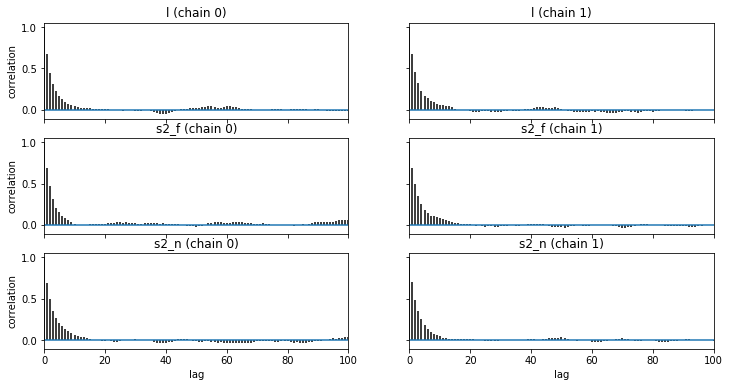

In [23]:
pm.autocorrplot(traceGP1);

In [24]:
df = pm.trace_to_dataframe(traceGP1)
df.corr()

,l,s2_f,s2_n
l,1.000000,0.235520,0.089449
s2_f,0.235520,1.000000,-0.105962
s2_n,0.089449,-0.105962,1.000000


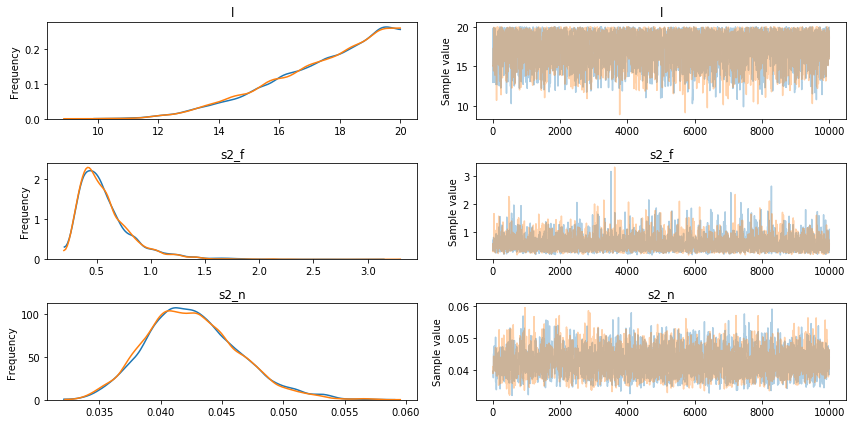

In [25]:
pm.traceplot(traceGP1, varnames=['l', 's2_f', 's2_n']);

In [26]:
x_pred = np.linspace(10,100,500)

In [27]:
with GPModel:
    fpred = mgp.conditional("fpred", Xnew = x_pred.reshape(-1,1), pred_noise=False)
    ypred = mgp.conditional("ypred", Xnew = x_pred.reshape(-1,1), pred_noise=True)
    gp_samples = pm.sample_ppc(traceGP1, vars=[fpred, ypred], samples=200)

100%|██████████| 200/200 [00:07<00:00, 25.19it/s]


In [28]:
meanpred = gp_samples['fpred'].mean(axis=0)
stdpred = gp_samples['fpred'].std(axis=0)

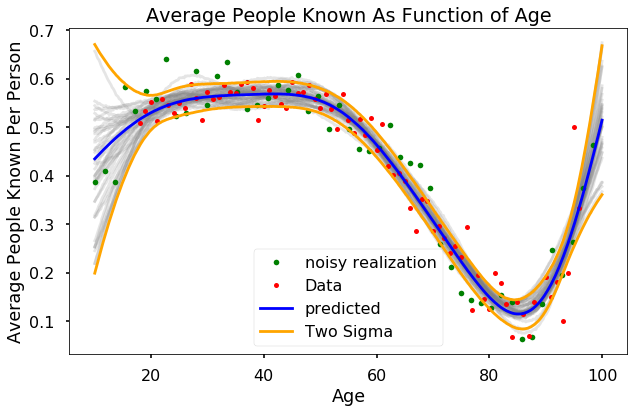

In [29]:
with sns.plotting_context("poster"):
    fig = plt.figure(figsize=(10,6))
    [plt.plot(x_pred, y, color="gray", alpha=0.2) for y in gp_samples['fpred'][::5,:]]
    # overlay the observed data
    plt.plot(x_pred[::10], gp_samples['ypred'][123,::10], '.', color="green", label="noisy realization")
    plt.plot(age, pLGBTQ, 'ro', ms=5, label="Data");
    plt.plot(x_pred, meanpred, 'b', ms=10, label="predicted");
    plt.plot(x_pred, meanpred - 2*stdpred, ms=3, color='orange', label="Two Sigma")
    plt.plot(x_pred, meanpred + 2*stdpred, ms=3, color='orange', label="Two Sigma")
    plt.xlabel('Age')
    plt.ylabel('Average People Known Per Person')
    plt.title('Average People Known As Function of Age')
    plt.legend()

**3. How do the models compare? Does age influence likelihood of acquaintance with someone LGBTQ? For Bayesian Linear Regression and GP Regression, how does age affect the variance of the estimates?**

If we simply constuct the linear Bayesian regression and do not perform any trnasformations on the data, we end up with a very bad fit to the data overall with a high residual value. That said, it creates a more or less consistent model over the entire span of the model without very many anomolies outside of the standard deviation envelope. In this model, the variance is relatively constant, irrespective of the age.

The Gaussian Process model, on the other hand, provides a much tighter fit to the data overall. We can see more the behavior of the model when there is a lack of data points, i.e. when the age is very low or very high. We also get a better sense of the data structure using the two-sigma envelopes at each of the points. In this model, the variance increases significantly when there are less data points.


## Problem 3:  Like a Punch to the Kidneys 

In this problem we will work with the US Kidney Cancer Dataset (by county), a dataset of kidney cancer frequencies across the US over 5 years on a per county basis. 

The kidney cancer data can be found [here](./kcancer.csv).

A casual inspection of the data might suggest that we independently model cancer rates for each of the provided counties.  Our experience in past homeworks/labs/lectures (in particular when we delved into the Rat Tumors problem) suggests potential drawbacks of conclusions based on raw cancer rates.  Addressing these drawbacks, let's look use a Bayesian model for our analysis of the data. In particular you will implement an Empircal Bayes model to examine the adjusted cancer rates per county.

Let $N$ be the number of counties; let $y_j$ the number of kidney cancer case for the $j$-th county, $n_j$ the population of the $j$-th county and $\theta_j$ the underlying kidney cancer rate for that county. We can construct a Bayesian model for our data as follows:
\begin{aligned}
y_j &\sim Poisson(5 \cdot n_j \cdot \theta_j), \quad j = 1, \ldots, N\\
\theta_j &\sim Gamma(\alpha, \beta), \quad j = 1, \ldots, N
\end{aligned}
where $\alpha, \beta$ are hyper-parameters of the model.

- (#1) Implement Empirical Bayes via moment matching as described as follows. Consider the **prior-predictive** distribution (also called the evidence i.e. the denominator normalization in bayes theorem) of the model: $p(y) = \int p(y \vert \theta) p(\theta) d \theta$. Why the prior-predictive? Because technically we "haven't seen" individual county data yet.  For this model, the prior-predictive is a negative binomial. Matching the mean and the variance of the negative binomial to that from the data, you can find appropriate expressions for $\alpha$ and $\beta$. (Hint: You need to be careful with the $5n_j$ multiplier.) 

- (#2) Produce a scatter plot of the raw cancer rates (pct mortality) vs the county population size. Highlight the top 300 raw cancer rates in red. Highlight the bottom 300 raw cancer rates in blue. Finally, on the same plot add a scatter plot visualization of the posterior mean cancer rate estimates (pct mortality) vs the county population size, highlight these in green.

- (#3) Using the above scatter plot, explain why using the posterior means from our model to estimate cancer rates is preferable to studying the raw rates themselves.

(**Hint:** You might also find it helpful to follow the Rat Tumor example.)

(**Note:** Up until now we've had primarily thought about the posterior predictive: $\int p( y \vert \theta) p(\theta \vert D) d\theta$.  The posterior predictive and the prior predictive can be somewhat connected. In conjugate models such as ours, the two distributions have the same form.) 

In [30]:
# Read in the data:
kid_data = pd.read_csv('kcancer.csv')
print('Data Shape:', kid_data.shape)
kid_data.head()

Data Shape: (3113, 7)


,state,fips,county,countyfips,dc,pop,pct_mortality
0,ALABAMA,1,AUTAUGA,1001,1.0,64915.0,0.000015
1,ALABAMA,1,BALDWIN,1003,15.0,195253.0,0.000077
2,ALABAMA,1,BARBOUR,1005,1.0,33987.0,0.000029
3,ALABAMA,1,BIBB,1007,1.0,31175.0,0.000032
4,ALABAMA,1,BLOUNT,1009,5.0,91547.0,0.000055


*(Procedure adapted from wikipedia section on Poisson-Gamma models and Patrick's Piazza post)*
#### Moment Matching
Before we analyze the model, we know that the form of $y_i$ will be:

$$
y_j \sim NegBin(\alpha, \frac{5n_j}{\beta + 5n_j})
$$

Thus, we know based on the understanding of expectation and variance of the negative binomial that the moments will be:
$$
\mathop{\mathbb{E}}[y_j] = \frac{5n_j\alpha}{\beta}\\
 \text{Var}[y_j] = \frac{(5n_j)^2\alpha}{\beta^2} + \frac{5n_j\alpha}{\beta}
$$


This is derived from the expectation and conditional variance of the negative binomial. We now want to find the expectation and variance of the mortality rates, and can thus show that these are:

$$
\mathop{\mathbb{E}}\bigg[\frac{y_j}{n_j}\bigg] = \frac{5\alpha}{\beta}\\
\text{Var}\bigg[\frac{y_j}{n_j}\bigg] = \mathop{\mathbb{E}}[y_j]\bigg(\frac{5}{\beta} + \frac{1}{\bar{n}}\bigg)
$$

At this point, we can now do the moment matching by solving for the hyperparameters of the model in terms of the sample-derived quantities. We thus end up with:

$$
\alpha = \frac{\mu}{\frac{\nu}{\mu} - \frac{1}{\bar{n}}}\\
\beta = \frac{5}{\frac{\nu}{\mu} - \frac{1}{\bar{n}}}
$$

where $\mu$ is the sample mean and $\nu$ is the sample variance.

In [31]:
m = kid_data['pct_mortality'].mean()
v = kid_data['pct_mortality'].var()
nbar = kid_data['pop'].mean()

alpha_est = m / (v/m - 1/nbar)
beta_est = 5 / (v/m - 1/nbar)

print('Alpha Est:', alpha_est)
print('Beta Est:', beta_est)

Alpha Est: 1.5445945865954498
Beta Est: 133464.15033286557


In [32]:
theta_post = np.empty(kid_data.shape[0])

# Loop over all of the counties
for n in range(kid_data.shape[0]):
    alpha_prime = kid_data['dc'][n] + alpha_est
    beta_prime = (5*kid_data['pop'][n] + 1/beta_est)**-1
    theta_post[n] = alpha_prime*beta_prime

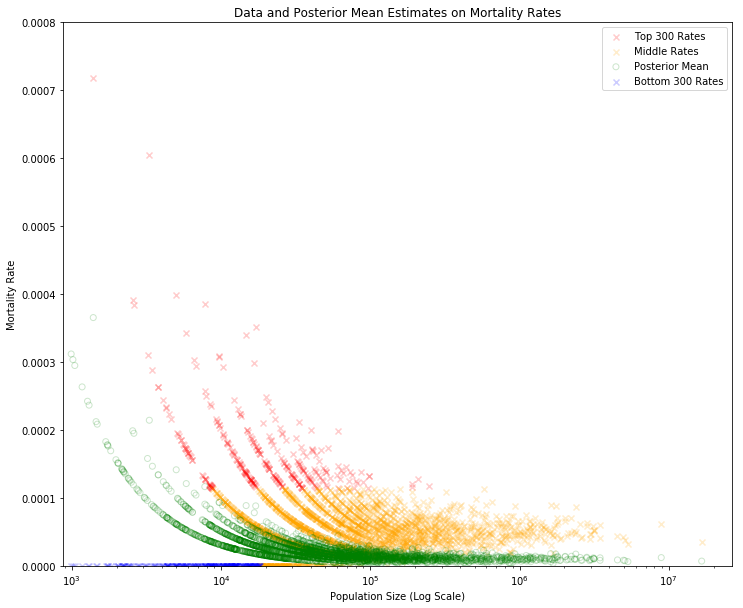

In [33]:
# Make scatter plots of results
fig = plt.figure(figsize=(12,10))

# Sort the arrays:
rate_sort, pop_sort = zip(*sorted(zip(kid_data['pct_mortality'].values, kid_data['pop'].values)))

# Plot the top 300 rates
plt.scatter(pop_sort[-300:], rate_sort[-300:], c='r', marker='x', alpha=.2, label='Top 300 Rates')

# Plot the remaining rates
plt.scatter(pop_sort[300:-300], rate_sort[300:-300], c='orange', marker='x', alpha=.2, label='Middle Rates')

# Plot the posterior mean estimates
plt.scatter(kid_data['pop'], theta_post, facecolors='none', edgecolors='g', alpha=.2, label='Posterior Mean')

# Plot the bottom 300 rates
plt.scatter(pop_sort[:300], rate_sort[:300], c='b', marker='x', alpha=.2, label='Bottom 300 Rates')

#plt.ylim([0, max(max(theta_post), max(kid_data['pct_mortality']))])
plt.ylim([0,.0008])
plt.xscale('log')
plt.title('Data and Posterior Mean Estimates on Mortality Rates')
plt.xlabel('Population Size (Log Scale)')
plt.ylabel('Mortality Rate')
plt.legend()
plt.show()

- (#3) Using the above scatter plot, explain why using the posterior means from our model to estimate cancer rates is preferable to studying the raw rates themselves.

In the data presented to us, we see a wide variance in the population sizes of the different counties. As a result, we do not expect all of the data to be very robust, and we anticipate seeing much wider ranges of percent mortalities in these counties. In this model that we constructed, we are using a partial pooling in Empirical Bayes by creating an empirical value for the hyperparameter into our rate model gamma distribution. The results we see match our intuition, as the estimated rates by the posterior means are generally more smooth than the actual data themselves. As a result, it is preferable to use the poseterior means on the rates because there is much less variation in the data due to a lack of statistical power of each sample.

## Problem 4: In the Blink of a Bayesian Iris

We've done classification before, but the goal of this problem is to introduce you to the idea of classification using Bayesian inference. 

Consider the famous *Fisher flower Iris data set* a  multivariate data set introduced by Sir Ronald Fisher (1936) as an example of discriminant analysis. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, you will build a model to predict the species. 

For this problem only consider two classes: **virginica** and **not-virginica**. 

The iris data can be obtained [here](./iris.csv).

Let $(X, Y )$ be our dataset, where $X=\{\vec{x}_1, \ldots \vec{x}_n\}$ and $\vec{x}_i$ is the standard feature vector corresponding to an offset 1 and the four components explained above. $Y \in \{0,1\}$ are the scalar labels of a class. In other words the species labels are your $Y$ data (virginica = 0 and virginica=1), and the four features -- petal length, petal width, sepal length and sepal width -- along with the offset make up your $X$ data. 

The goal is to train a classifier, that will predict an unknown class label $\hat{y}$ from a new data point $x$. 

Consider the following glm (logistic model) for the probability of a class:

$$ p(y) = \frac{1}{1+e^{-x^T \beta}} $$

(or $logit(p) = x^T \beta$ in more traditional glm form)

where $\beta$ is a 5D parameter to learn. 

Then given $p$ at a particular data point $x$, we can use a bernoulli likelihood to get 1's and 0's. This should be enough for you to set up your model in pymc3. (Other Hints: also use theano.tensor.exp when you define the inverse logit to go from $\beta$ to $p$, and you might want to set up $p$ as a deterministic explicitly so that pymc3 does the work of giving you the trace).

Use a 60-40 stratified (preserving class membership) split of the dataset into a training set and a test set. (Feel free to take advantage of scikit-learn's `train_test_split`).

1. Choose a prior for $\beta \sim N(0, \sigma^2 I) $ and write down the formula for the normalized posterior $p(\beta| Y,X)$. Since we dont care about regularization here, just use the mostly uninformative value $\sigma = 10$.
2. Find the MAP and mean estimate for the posterior on the training set.
3. Implement a  sampler to sample from this posterior of $\beta$.   Generate samples of $\beta$ and plot the sequence of $\beta$'s  and histograms for each $\beta$ component.



### Formula for normalized posterior:

Using Bayes rule, we can construct the posterior:

$$ 
p(\beta\mid Y,X) = \frac{p(\beta) p(Y|X,\beta)  }{p(Y)} 
$$

with evidence:

$$
p(Y) = \int_\beta p(Y\mid\beta)p(\beta)d\beta
$$

prior:

$$
p(\beta) = \frac{1}{\sqrt{(2\pi)^5\sigma^2}} \exp{\bigg( \frac{x^Tx}{\sigma^2} \bigg)}
$$

and likelihood:

$$
p(Y|X,\beta) = \prod_i p(y_i=1)^{y_i} * (1-p(y_i=1))^{1-y_i}
$$

where

$$
p(y_i=1) = \frac{1}{1 + e^{-x_i^T\beta} }
$$



In [34]:
# Read in the data and show it
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
# Convert the class to binary
class_vals = iris['class'].unique()
print(class_vals)
target_mapping = {
            class_vals[0]: 0,
            class_vals[1]: 0,
            class_vals[2]: 1}

iris['class'] = iris['class'].map(target_mapping)
iris.head()

[' Iris-setosa' ' Iris-versicolor' ' Iris-virginica']


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
# Augment data with a column of ones
iris.insert(0, 'ones', 1)
iris.head()

,ones,sepal_length,sepal_width,petal_length,petal_width,class
0,1,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,1,4.7,3.2,1.3,0.2,0
3,1,4.6,3.1,1.5,0.2,0
4,1,5.0,3.6,1.4,0.2,0


In [37]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,0:5], iris['class'], 
                                                    test_size=0.40, random_state=42)

X_train_array = X_train.values

In [38]:
# Construct a pymc3 model
sigma=10
with pm.Model() as iris_model:
    # Prior on beta
    beta = pm.Normal('beta', mu=0, sd=sigma, shape=X_train.shape[1])
    
    # Probabilities of each class
    p = pm.Deterministic('p', 1 / (1 + theano.tensor.exp(pm.math.dot(-X_train.values, beta))) )
    
    # Data likelihood
    obs_class = pm.Bernoulli('obs_class', p=p, observed=y_train.values)

In [39]:
map_estimate = pm.find_MAP(model=iris_model)
print(map_estimate)

logp = -22.875, ||grad|| = 0.12477: 100%|██████████| 39/39 [00:00<00:00, 1678.00it/s]  

{'beta': array([-10.61649061,  -2.50514173,  -5.54864407,   5.08491244,  10.09598843]), 'p': array([  8.46658190e-01,   1.11357632e-13,   1.35057752e-13,
         6.83948660e-13,   5.79351270e-03,   6.87051752e-15,
         3.12712873e-04,   9.94979329e-01,   4.38619794e-14,
         7.10004681e-04,   9.98940746e-01,   1.79130862e-17,
         5.71282498e-01,   9.93225417e-01,   5.99556984e-04,
         5.92952801e-02,   9.96548680e-01,   2.43109562e-02,
         4.21038903e-15,   1.20002115e-04,   9.89031268e-01,
         9.24540592e-15,   5.82412452e-15,   6.86469956e-04,
         1.88600435e-01,   2.18294977e-14,   9.99923711e-01,
         8.82645628e-15,   4.78078915e-13,   3.60745712e-01,
         1.83842279e-05,   9.98567849e-01,   8.11219683e-01,
         9.07674350e-01,   9.99541332e-01,   8.14683453e-03,
         3.82477352e-13,   2.23593959e-14,   9.37858605e-01,
         9.06623001e-01,   1.27027490e-13,   6.51093210e-15,
         1.32067584e-13,   4.47583264e-01,   9.994140

In [40]:
# Do the sampling
with iris_model:
    stepper = pm.NUTS()
    trace_iris = pm.sample(10000, step=stepper, start=map_estimate)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta]
100%|██████████| 10500/10500 [02:26<00:00, 71.73it/s]
There were 48 divergences after tuning. Increase `target_accept` or reparameterize.
There were 544 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12741da58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1341856d8>]], dtype=object)

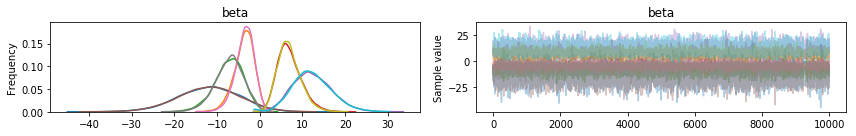

In [41]:
pm.traceplot(trace_iris, varnames=['beta'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134927fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121bc3320>]], dtype=object)

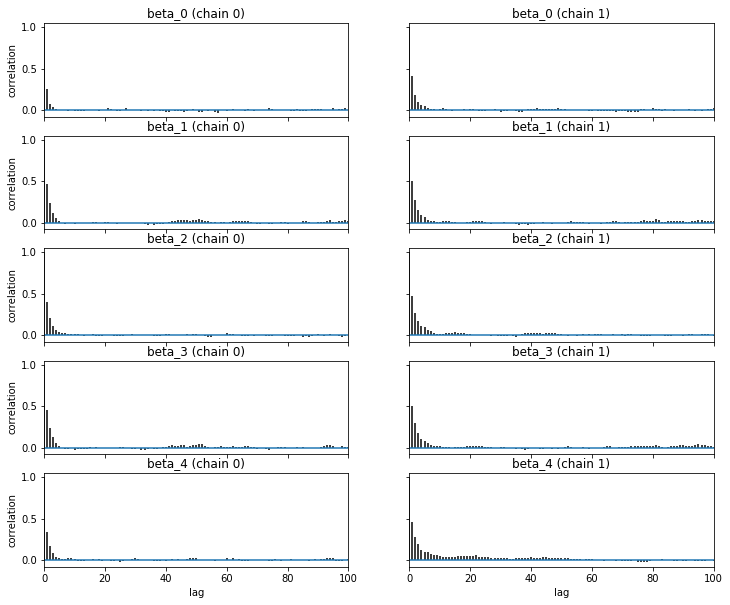

In [42]:
pm.autocorrplot(trace_iris, varnames=['beta'])

In [43]:
hm2df=pm.trace_to_dataframe(trace_iris, varnames=['beta'])
hm2df.corr()

,beta__0,beta__1,beta__2,beta__3,beta__4
beta__0,1.000000,-0.278212,-0.164432,-0.030350,-0.156808
beta__1,-0.278212,1.000000,-0.060017,-0.822279,-0.000410
beta__2,-0.164432,-0.060017,1.000000,-0.197516,-0.629396
beta__3,-0.030350,-0.822279,-0.197516,1.000000,-0.035824
beta__4,-0.156808,-0.000410,-0.629396,-0.035824,1.000000


In [44]:
# Calculate the mean values:
post_beta_means = trace_iris['beta'].mean(axis=0)
post_beta_means

array([-11.93427776,  -3.59855868,  -7.17866057,   6.93523917,  12.25492663])

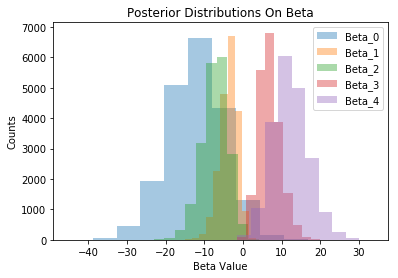

In [45]:
# Show beta posterior histograms
for n in range(trace_iris['beta'].shape[1]):
    plt.hist(trace_iris['beta'][:,n], alpha=0.4, label=r'Beta_%d'%n)
plt.legend()
plt.xlabel('Beta Value')
plt.ylabel('Counts')
plt.title('Posterior Distributions On Beta')
plt.show()

### Testing the model:
Now we can test if the model is accurate.

In [47]:
import sklearn
# Get predictions on test set and compare accuracy
p_pred = 1 / (1 + np.exp(-X_test @ post_beta_means))
y_pred = np.random.binomial(1,p_pred)
sklearn.metrics.confusion_matrix(y_test.values, y_pred)

array([[41,  1],
       [ 1, 17]])

In [48]:
sklearn.metrics.jaccard_similarity_score(y_test, y_pred)

0.96666666666666667